# Clustering Algorithms

### Hierarchical Clustering

#### a) Simulated Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

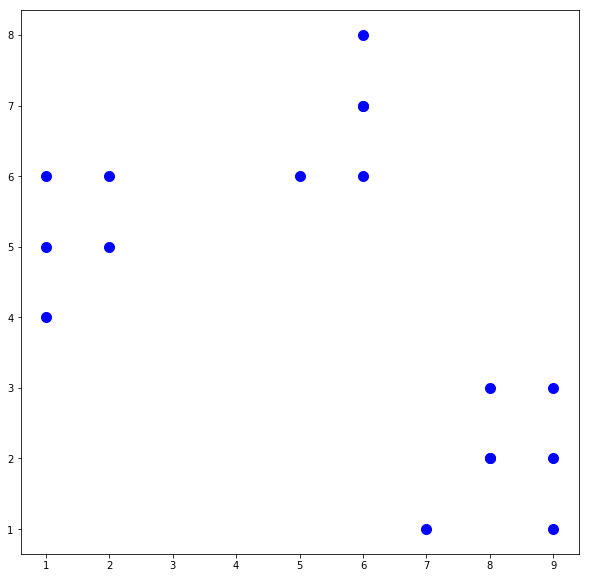

In [2]:
# Create a data set

x1 = np.array([2, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# Plot the data points

plt.figure(figsize=(10, 10))  
plt.plot(x1, x2, color='blue', marker='o', linestyle='None', markersize=10)


In [ ]:
# # Another data set with outlier and try for fiding best cluster
# # Dataset with connecting data points
# x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8,4,4,2.5,3.5,1])
# x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3,6,5,5,5.5,1])

# # Plot the data points

# plt.figure(figsize=(10, 10))  
# plt.plot(x1, x2, color='blue', marker='o', linestyle='None', markersize=10)


In [4]:
# Create a numpy array with len(x1 or x2) rows and 2 columns. Reshape to make sure.

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [5]:
# Import library for dendograms 

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward')) 
#You could use different methods like 'ward', 'single', 'complete', 'average

As the red line is longer than the vertical blue line above it, hence we make a horizontal cut at y ~10

In [9]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=10, color='magenta', linestyle='--')

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  
pred = cluster.fit_predict(X)

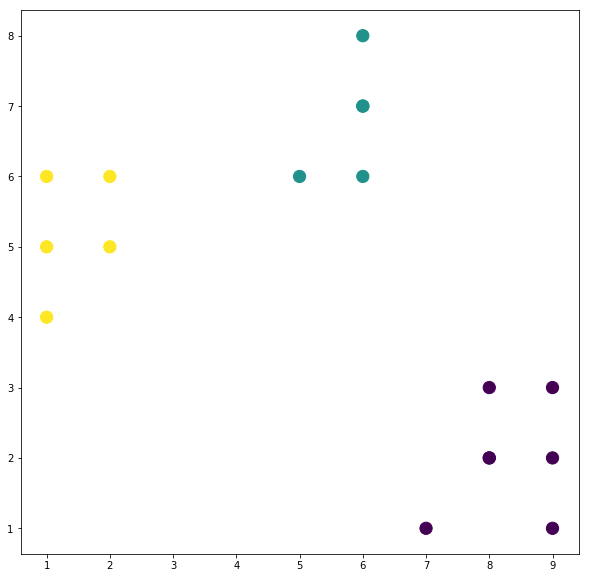

In [11]:
plt.figure(figsize=(10, 10))  
plt.scatter(X[:,0], X[:,1], c = cluster.labels_,marker = 'o', s = 150) 

#### b) Wholesale Business Customers Segmentation

In this analysis we are going to segment customers of a wholesale business. The data is hosted on the UCI Machine Learning repository. We will try to cluster customers based on their annual spending on product categories, like milk, grocery, frozen. We also have information about their region.

In [16]:
#Read Data from csv file kept in the same folder as python notebook
data = pd.read_csv('Wholesale customers data.csv')
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [17]:
# Quick Checks
print("Number of rows =",data.shape[0], "Number of variables =", data.shape[1])
print(data['Region'].value_counts())
print(data['Channel'].value_counts())

Number of rows = 440 Number of variables = 8
3    316
1     77
2     47
Name: Region, dtype: int64
1    298
2    142
Name: Channel, dtype: int64


In [18]:
#Data Normalization to bring all variables on same scale
#Important as different original ranges of variables will bias the distance metric

from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

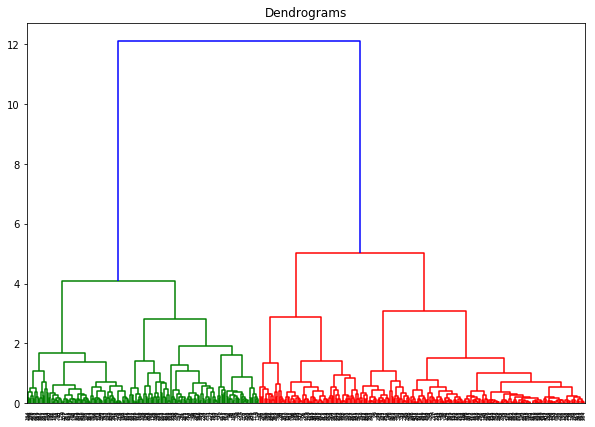

In [19]:
#Create Dendogram using scipy.
#One could also do this using sklearn, however sklearn also scipy in the background

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
#plt.figure(figsize=(50, 50))  #To visualize all leaves use this
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In above dendogram as you could notice, the longest vertical line is in color blue. This points us to prune the dendogram at y-value ~ 6

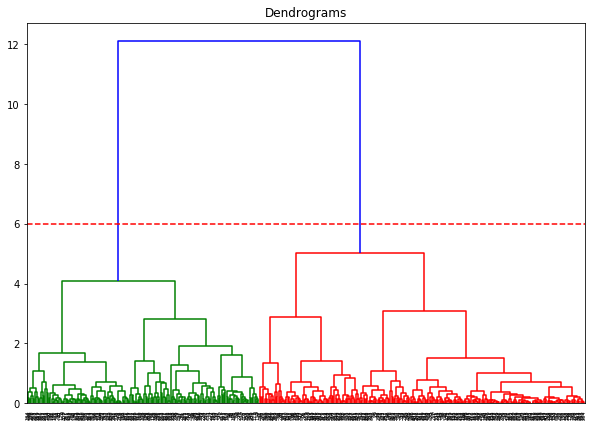

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Horizontal line splits the dendogram into 2 parts --> 2 Clusters

In [21]:
%%time
# Provide number of clusters and scaled data as input to run clustering algorithm
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

CPU times: user 23.5 ms, sys: 18.1 ms, total: 41.7 ms
Wall time: 78.2 ms


Above are the cluster labels for the initial 440 customers

In [22]:
#data_scaled.columns

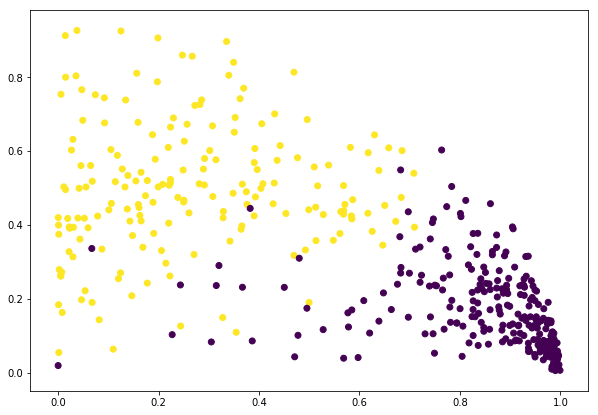

In [23]:
# Plot data with cluster labels color coding

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Fresh'], data_scaled['Milk'], c=cluster.labels_) 

#### c)  Wine Clustering Problem

** Data Set **
* UCI Machine Learning Repository - Wine Quality Data Set
* Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal.
* From https://archive.ics.uci.edu/ml/datasets/wine+quality

In [24]:
#Import Wine Data and Label Them

white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine['type'] = 1

red_wine = pd.read_csv('winequality-red.csv', sep = ';')
red_wine['type'] = 0

wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  type  
0      8.8        6     1  
1      9.5        6     1  
2     10.1        6     1  
3      9.9        6     1  
4      9.9        6     1

In [25]:
print("Shape =", wine_df.shape)
print(wine_df['type'].value_counts())

Shape = (6497, 13)
1    4898
0    1599
Name: type, dtype: int64


In [26]:
#Data Normalization to bring all variables on same scale
#Important as different original ranges of variables will bias the distance metric

from sklearn.preprocessing import normalize
wine_df_scaled = normalize(wine_df.iloc[:, :-1])
wine_df_scaled = pd.DataFrame(wine_df_scaled, columns=wine_df.iloc[:, :-1].columns)
wine_df_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.039424          0.001521     0.002028        0.116583   0.000253   
1       0.047219          0.002249     0.002548        0.011992   0.000367   
2       0.078777          0.002723     0.003890        0.067107   0.000486   
3       0.037393          0.001195     0.001662        0.044145   0.000301   
4       0.037393          0.001195     0.001662        0.044145   0.000301   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.253440              0.957441  0.005638  0.016896   0.002534   
1             0.104932              0.989359  0.007450  0.024734   0.003673   
2             0.291767              0.943382  0.009678  0.031705   0.004279   
3             0.244095              0.965995  0.005171  0.016567   0.002077   
4             0.244095              0.965995  0.005171  0.016567   0.002077   

    alcohol   quality  
0  0.049562  0.033792  
1  0.071204  0.044971  
2  0.098228  0.058353  
3  0.051416  0.031161  
4  0.051416  0.031161

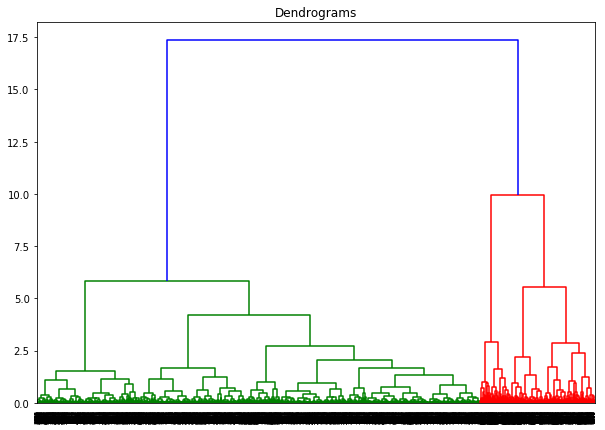

In [27]:
# Create Dendogram using scipy.
# One could also do this using sklearn, however sklearn also scipy in the background

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(wine_df_scaled, method='ward'))

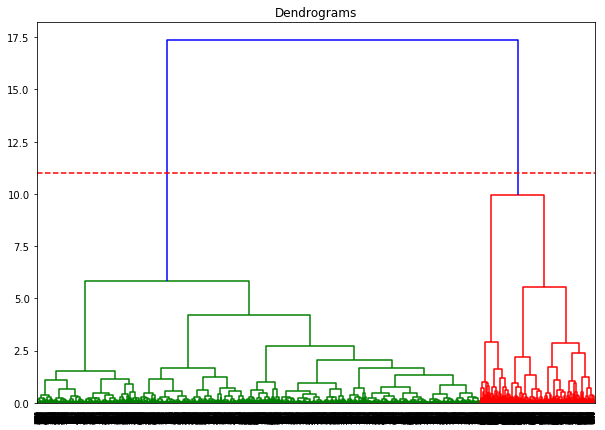

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wine_df_scaled, method='ward'))
plt.axhline(y=11, color='r', linestyle='--')

In [29]:
%%time
# Provide number of clusters and scaled data as input to run clustering algorithm

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(wine_df_scaled)

CPU times: user 1.1 s, sys: 127 ms, total: 1.23 s
Wall time: 1.23 s


In [30]:
# Add poredicted labels to original data with true labels

wine_df['preds'] = labels

* Create cross tab between red-white wine labels and our clusters
* Note_1- In real-world clustering problems you won't have labels for creating this matrix
* Note_2- We are not trying to classify the data here. We are just checking that if we cluster them can red and white wine form natural clusters using the given variables

In [31]:
pd.crosstab(wine_df['type'], wine_df['preds'])

preds     0     1
type             
0      1193   406
1       136  4762

** Visualizing Your Clustering Output **
* We will use PCA to reduce dimensionality while capturing most of the variance
* PCA components will help us to visualize the data in 2-D plot

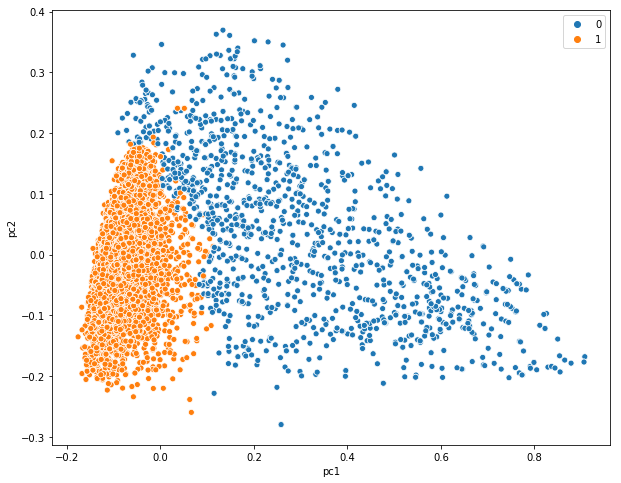

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from seaborn import scatterplot as scatter

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(wine_df_scaled)

prin_comp = pd.DataFrame(principalComponents, columns= ['pc1', 'pc2'] )

f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(prin_comp.iloc[:, 0], prin_comp.iloc[:, 1], hue=labels)

### k-means

#### a) Simulated Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

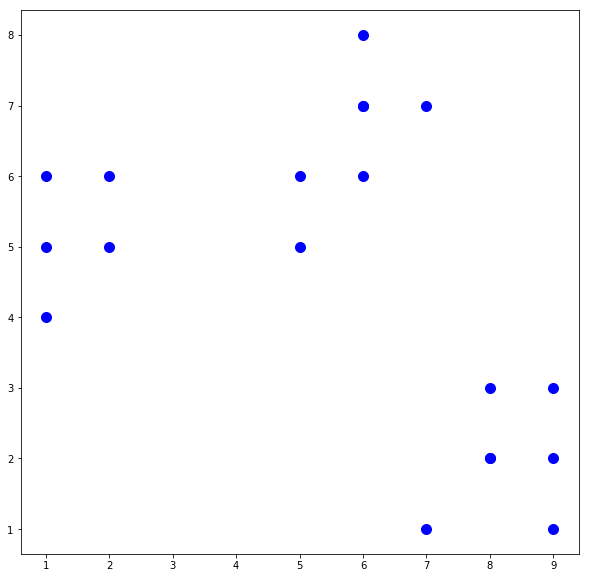

In [38]:
# Create a data set

x1 = np.array([2, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8,5,7])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3,5,7])

# Plot the data points

plt.figure(figsize=(10, 10))  
plt.plot(x1, x2, color='blue', marker='o', linestyle='None', markersize=10)

In [39]:
# Create a numpy array with len(x1 or x2) rows and 2 columns. Reshape to make sure.

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
# Run loop over different values of k and capture distortion

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

** Use below code to understand distortion logic for Elbow Method **

In [41]:

# kmeanModel = KMeans(n_clusters=3).fit(X)
# kmeanModel.fit(X)
# print("Centroids = \n", kmeanModel.cluster_centers_)
# print("\n Distance between each point and centroid = \n", cdist(X, kmeanModel.cluster_centers_, 'euclidean'))
# print("\n Min distance between each point and selected centroid = \n", (np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))
# print("\n Sum of squares = \n",sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))



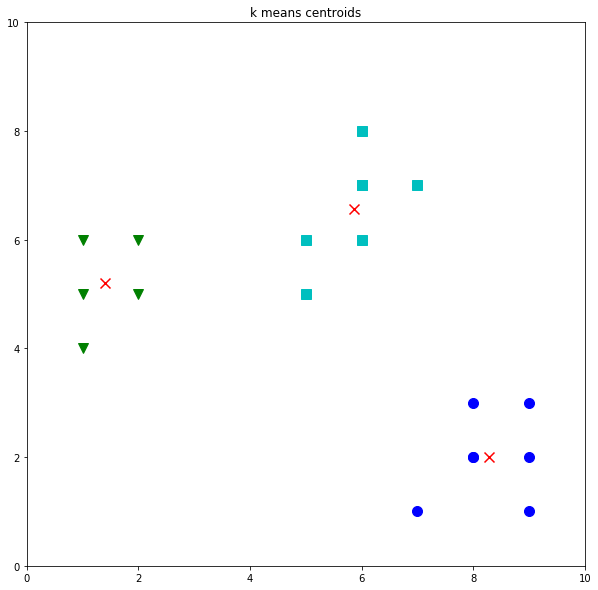

In [42]:
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

centers = np.array(kmeans_model.cluster_centers_)
plt.figure(figsize=(10, 10)) 
plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None', markersize = 10)
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r',s = 100)
plt.show()

#### b) Wine Clustering Problem

In [46]:
#Import Wine Data and Label Them

white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine['type'] = 1

red_wine = pd.read_csv('winequality-red.csv', sep = ';')
red_wine['type'] = 0

wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df.head()

print("Shape =", wine_df.shape)
print(wine_df['type'].value_counts())

#Data Normalization to bring all variables on same scale
#Important as different original ranges of variables will bias the distance metric

from sklearn.preprocessing import normalize
wine_df_scaled = normalize(wine_df.iloc[:, :-1])
wine_df_scaled = pd.DataFrame(wine_df_scaled, columns=wine_df.iloc[:, :-1].columns)
wine_df_scaled.head(n=3)

Shape = (6497, 13)
1    4898
0    1599
Name: type, dtype: int64


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.039424          0.001521     0.002028        0.116583   0.000253   
1       0.047219          0.002249     0.002548        0.011992   0.000367   
2       0.078777          0.002723     0.003890        0.067107   0.000486   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.253440              0.957441  0.005638  0.016896   0.002534   
1             0.104932              0.989359  0.007450  0.024734   0.003673   
2             0.291767              0.943382  0.009678  0.031705   0.004279   

    alcohol   quality  
0  0.049562  0.033792  
1  0.071204  0.044971  
2  0.098228  0.058353

** Find optimal number of clusters using elbow method **

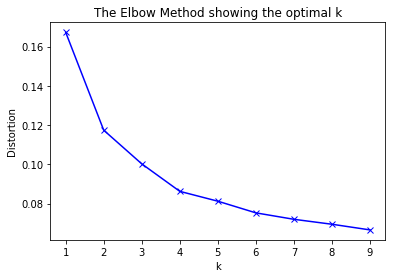

In [47]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
# Run loop over different values of k and capture distortion

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(wine_df_scaled)
    kmeanModel.fit(wine_df_scaled)
    distortions.append(sum(np.min(cdist(wine_df_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wine_df_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* In above chart, the drop is quite steep from k = 1 to k = 2 and then it becomes gradual. Hence, optimum number of clusters(k) = 2
* But someone could debate that even k = 4 is a good option. Let's try both

In [48]:
%%time
# KMeans algorithm 

K = 2
kmeans_model = KMeans(n_clusters=K).fit(wine_df_scaled)
labels = kmeans_model.labels_
wine_df['preds'] = ['cluster_1' if i == 1 else "cluster_2" for i in labels]

# K = 4
# kmeans_model = KMeans(n_clusters=K).fit(wine_df_scaled)
# labels = kmeans_model.labels_
# wine_df['preds'] = labels



CPU times: user 252 ms, sys: 46.1 ms, total: 298 ms
Wall time: 78.4 ms


In [49]:
pd.crosstab(wine_df['type'], wine_df['preds'])

preds  cluster_1  cluster_2
type                       
0            812        787
1             26       4872

** Visualizing Your Clustering Output **

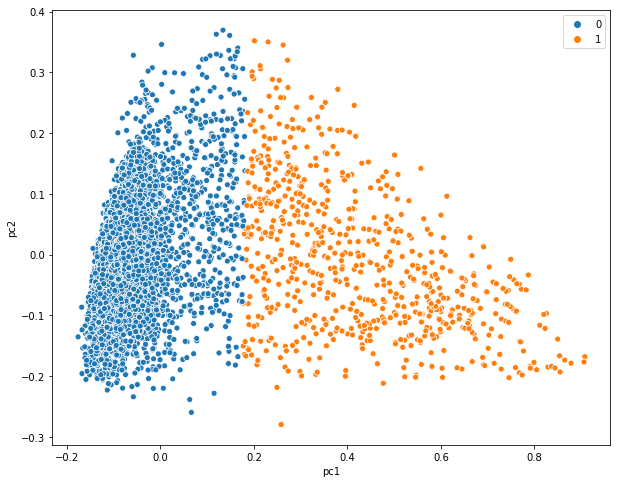

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from seaborn import scatterplot as scatter

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(wine_df_scaled)

prin_comp = pd.DataFrame(principalComponents, columns= ['pc1', 'pc2'] )

f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(prin_comp.iloc[:, 0], prin_comp.iloc[:, 1], hue=labels)

### DBSCAN

#### a)  Simulated Data

In [33]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

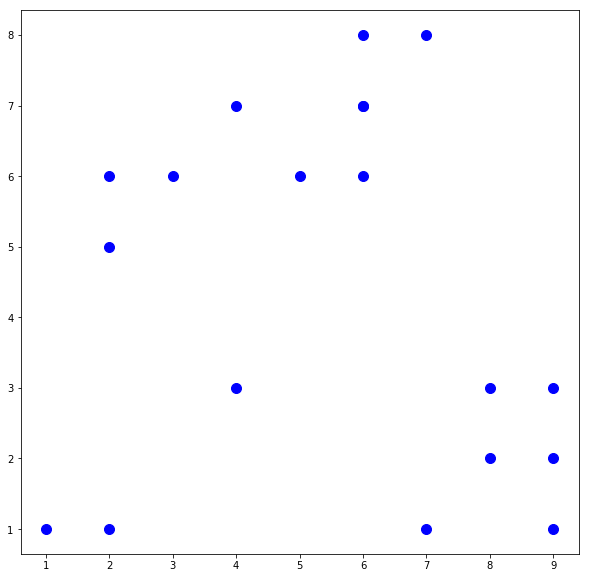

In [40]:

x1 = np.array([2, 3, 4, 2, 7, 6, 6, 6, 5, 6, 7, 8, 9, 9, 9, 8,2,1,4])
x2 = np.array([5, 6, 7, 6, 8, 8, 6, 7, 6, 7, 1, 2, 1, 3, 2, 3,1,1,3])

# x1 = np.array([2, 3, 4, 2, 7, 6, 6, 6, 5, 6, 7, 8, 9, 9, 9, 8,2,1,7, 6])
# x2 = np.array([5, 6, 7, 6, 8, 8, 6, 7, 6, 7, 1, 2, 1, 3, 2, 3,1,1,4, 5])

# Plot the data points

plt.figure(figsize=(10, 10))  
plt.plot(x1, x2, color='blue', marker='o', linestyle='None', markersize=10)

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

We develop a simple but effective heuristic to determine the parameters Eps and MinPts of the "thinnest" cluster in the database. This heuristic is based on the following observation. Let d be the distance of a point p to its k-th
nearest neighbor, then the d-neighborhood of p contains exactly k+l points for almost all points p. 

For a given k we define a function k-dist from the database D to the real numbers, mapping each point to the distance
from its k-th nearest neighbor. When sorting the points of the database in descending order of their k-dist values, the graph of this function gives some hints concerning the density distribution in the database. We call this graph the sorted k-dist graph.

If we choose an arbitrary point p, set the parameter Eps to k-dist(p) and set the parameter MinPts to k, all points
with an equal or smaller k-dist value will be core points. If we could find a threshold point with the maximal k-dist value in the "thinnest" cluster of D we would have the desired parameter values. 

In [41]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto', metric = 'euclidean').fit(X)
distances, indices = nbrs.kneighbors(X)

distances = pd.DataFrame(distances)

In [42]:
k = 4
Sorted = pd.Series(distances.loc[:,k-1]).sort_values(ascending=False)
Sorted.reset_index(inplace=True, drop = True)

In [43]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

# Create a trace
trace = Scatter(
    x = np.array(range(len(Sorted))),
    y = np.array(Sorted.values)
)

data = [trace]

iplot(data, filename='basic-line')


In [44]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps= 2.8, min_samples= 2, metric='euclidean', algorithm='auto').fit(X)
labels = db.labels_

In [45]:
from seaborn import scatterplot as scatter

f, axes = plt.subplots(1, 1, figsize=(10,10))
scatter(x1, x2, hue=labels,s = 100)

Note: Label -1 is an outlier flag within this DBSCAN library

### GMM

####  GMM Algorithm Explanation

** Gaussian Mixture Models **

* GMM assumes the observations are generated from a mixture of finite number of Gaussian distributions with unknown parameters. 


* To cluster the observations we do reverse engineering and identify the probabilities of each Gaussian distribution for a given observation. 

From Bayes theorem:

$$P(k\mid x_i) = \frac{P(x_i \mid k) P(k)}{\sum_{k}P(x_i \mid k) P(k)} \ \forall \ k \in K$$

Where, $x_i \sim N(\mu_k, \Sigma_k)$ ; $P(x_i \mid k) = N(x_i \mid \mu_k, \Sigma_k)$ ; $P(k)$ is the proportion of observations in cluster `k`


**Model Parameters:** $\pi_k = P(k)$ (Say) ; $\mu_k$ and $\Sigma_k$

**Hyper parameters:** Number of clusters (size of `K`)

There are different ways to learn model parameters, we will talk about EM (Expectation-Maximization) algorithm in this tutorial.


** EM Algorithm to Maximize Likelihood **

**Objective:** 

$$Maximize \ L = \sum_i P(x_i \mid \pi, \mu, \Sigma)$$

**Inputs:** 

$$x_1, x_2, x_3 .... x_n \ \forall \ x_i \in R^d$$

Initialize $\pi$; $\mu$ and $\Sigma$

**E-Step:** Compute $P(k \mid x_i) \ \forall \ i, k$ as follows

$$P(k \mid x_i) = \frac{\pi_k P(x_i \mid \mu_k, \Sigma_k)}{\sum_j \pi_k P(x_i \mid \mu_k, \Sigma_k)} \ \forall \ i = 1,2,3 ... n ; k \in K$$

**M-Step:**

Let us define $n_k = \sum_i P(k \mid x_i) \ \forall \ k \in K$

Update model parameters as follow:

$$\pi_k = \frac{n_k}{n} \ \forall \ k \in K$$
$$\mu_k = \frac{1}{n_k}\sum_i P(k \mid x_i)x_i \ \forall k \in K$$
$$\Sigma_k = \frac{1}{n_k}\sum_i P(k \mid x_i) (x_i - \mu_k)^T(x_i - \mu_k) \ \forall \ k \in K$$

Repeat E and M steps until consecutive difference between `L` is very minimum


#### a) Simulated Data

In [77]:
# Generating sample data

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.8, random_state=0)
X = X[:, ::-1]
X[:5]

array([[ 6.0392027 ,  0.74950454],
       [ 2.38996888, -3.08834729],
       [ 3.11906979, -3.35780005],
       [ 4.31777065,  0.61184408],
       [ 2.20670517, -2.87187859]])

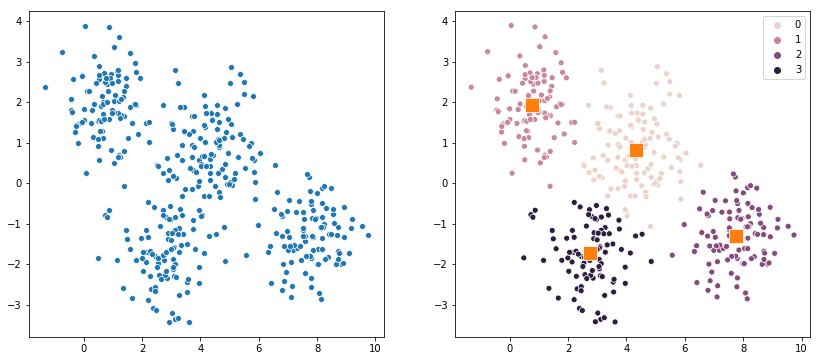

In [78]:
# Using GMM to cluster observations
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
%matplotlib inline

gmm = GaussianMixture(n_components=4).fit(X) # Where n_components is number of clusters
labels = gmm.predict(X)

f, axes = plt.subplots(1, 2, figsize=(14,6))

scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=labels)

scatter(gmm.means_[:,0], gmm.means_[:,1], ax=axes[1],marker="s",s=200)
plt.show()


In [79]:
# Probabilities of each observation across Gaussian models
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.996 0.    0.004 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.998 0.    0.    0.002]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.899 0.    0.    0.101]
 [0.003 0.    0.    0.997]
 [0.003 0.997 0.    0.   ]]


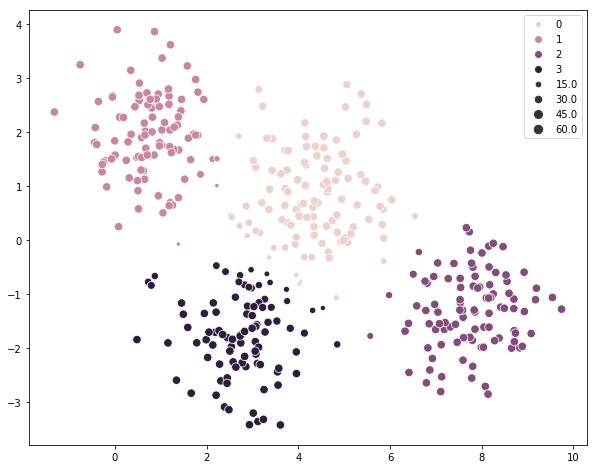

In [80]:
# Visualizing the certainity (size of the bubble proportional to certainity of it's prediction)
size = 50 * probs.max(1) ** 2
f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(X[:, 0], X[:, 1], hue=labels, size=size)

#### b) Wine Clustering Problem

In [86]:
import pandas as pd
import numpy as np

white_wine = pd.read_csv('winequality-white.csv', sep = ';')
white_wine['type'] = 1
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
red_wine['type'] = 0
wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df.head()


#Data Normalization to bring all variables on same scale
#Important as different original ranges of variables will bias the distance metric

from sklearn.preprocessing import normalize
wine_df_scaled = normalize(wine_df.iloc[:, :-1])
wine_df_scaled = pd.DataFrame(wine_df_scaled, columns=wine_df.iloc[:, :-1].columns)
wine_df_scaled.head(n=3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.039424          0.001521     0.002028        0.116583   0.000253   
1       0.047219          0.002249     0.002548        0.011992   0.000367   
2       0.078777          0.002723     0.003890        0.067107   0.000486   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.253440              0.957441  0.005638  0.016896   0.002534   
1             0.104932              0.989359  0.007450  0.024734   0.003673   
2             0.291767              0.943382  0.009678  0.031705   0.004279   

    alcohol   quality  
0  0.049562  0.033792  
1  0.071204  0.044971  
2  0.098228  0.058353

**  Fitting GMM and compare type of wine with cluster labels **

In [88]:
gmm_wine = GaussianMixture(n_components=2).fit(wine_df_scaled)
labels = gmm_wine.predict(wine_df_scaled)
wine_df['preds'] = ['cluster_1' if i == 1 else "cluster_2" for i in labels]
pd.crosstab(wine_df['type'], wine_df['preds'])

preds  cluster_1  cluster_2
type                       
0           1329        270
1            185       4713

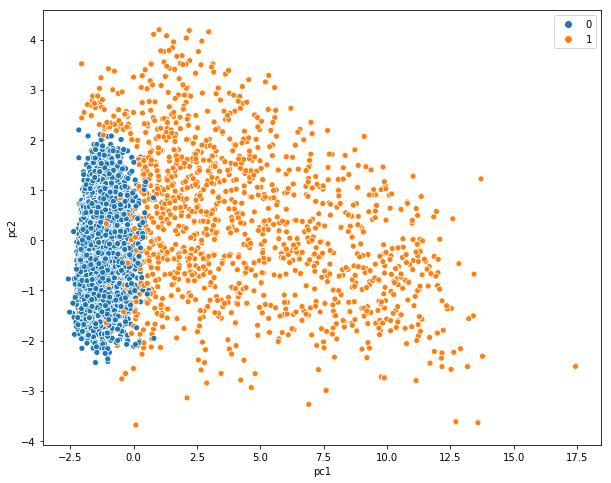

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

white_wine_scale = StandardScaler().fit_transform(wine_df_scaled)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(white_wine_scale)

prin_comp = pd.DataFrame(principalComponents, columns= ['pc1', 'pc2'] )

f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(prin_comp.iloc[:, 0], prin_comp.iloc[:, 1], hue=labels)

### LDA

#### LDA Explanation

So far we have discussed soft clustering on tabular data. Now we will discuss about soft clustering on text data, this is also called as topic modelling.

`LDA` assumes that documents are created as below:

* You have given `K` labelled boxes with topic names as label and there are different number of words within each box

* To create a document of `N` words, you have to randomly select a box and a word within that box and keep it in your document 

Now we have documents with us but not sure how they created. Objective is to find `latent` topics, which represents document.

Below diagram explains how LDA works


![image](lda_image.png)

Where, 

** Input parameters:**

* `M` is the number of documents (also called as size of the corpus)

* `N` is the number of words in each document

* `k` is the total number of topics

* `w` is a word in document

* `z` is a topic from a set of topics

* `V` is the size of the vocabulary (Vocabulary is a collection of words from all documents)

** Note: ** Topic is a collection words with weights

** Model Parameters: **

* $\alpha$ is the topic distribution for each document, $M X k$ matrix of probabilities

* $\eta$ is the word distribution for each topic, $k X V$ matrix of probabilities

* $[\theta_{ij}]$ is the probability of $i^{th}$ document containing words from $j^{th}$ topic, $M X k$ matrix

* $[\beta_{ij}]$ is the probability of $i^{th}$ topic containing $j^{th}$ word, $k X V$ matrix

Where, $\theta, \beta \sim Dirichlet \ Distribution$


#### a) Using LDA on NEWS headlines data

** Data from Kaggle Million Headlines **

In [5]:
news_headlines = pd.read_csv('news_headlines.csv')
news_headlines = news_headlines[news_headlines['publish_date'] > 20150000].reset_index(drop=True)
news_headlines.head()

publish_date                                      headline_text
0      20150101                    1000s celebrate nye in adelaide
1      20150101                   1984 qld cabinet papers released
2      20150101              2014 year in interactive storytelling
3      20150101              35 dead in shanghai new year stampede
4      20150101  airasia qz8501 first two bodies arrive in sura...

In [91]:
data_text = news_headlines[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

In [93]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
stemmer = SnowballStemmer("english")

** Text pre-processing **

In [99]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

#Simple Pre-Process --> Lowercase, removes very small and big tokens

In [101]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ',doc_sample )
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document:  mackay weather station to be upgraded
['mackay', 'weather', 'station', 'to', 'be', 'upgraded']


 tokenized and lemmatized document: 
['mackay', 'weather', 'station', 'upgrad']


In [102]:
processed_docs = documents['headline_text'].map(preprocess) #map function returns a list after applying the function
processed_docs[:10]

0                                   [celebr, adelaid]
1                            [cabinet, paper, releas]
2                          [year, interact, storytel]
3                     [dead, shanghai, year, stamped]
4                    [airasia, bodi, arriv, surabaya]
5         [airasia, offici, say, black, search, week]
6               [alcohol, produc, talk, nativ, plant]
7                        [leagu, live, stream, updat]
8    [argentina, presid, announc, dog, allow, flight]
9          [asian, volunt, provid, home, grind, help]
Name: headline_text, dtype: object

** Bag-of-words **

In [103]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 adelaid
1 celebr
2 cabinet
3 paper
4 releas
5 interact
6 storytel
7 year
8 dead
9 shanghai
10 stamped


In [104]:
#Filter Extrmes by frequency and total document percentage
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [105]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(468, 1), (912, 1), (1451, 1), (2919, 1)]

In [107]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 468 ("station") appears 1 time.
Word 912 ("weather") appears 1 time.
Word 1451 ("upgrad") appears 1 time.
Word 2919 ("mackay") appears 1 time.


** LDA on bag-of-words **

In [108]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [109]:
for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"centr" + 0.011*"farmer" + 0.010*"box" + 0.009*"sport" + 0.009*"marriag" + 0.009*"histori" + 0.008*"play" + 0.007*"grand" + 0.007*"say" + 0.007*"island"
Topic: 1 
Words: 0.046*"australia" + 0.026*"north" + 0.018*"coast" + 0.016*"south" + 0.015*"test" + 0.015*"korea" + 0.014*"work" + 0.011*"worker" + 0.011*"gold" + 0.010*"say"
Topic: 2 
Words: 0.056*"trump" + 0.024*"world" + 0.019*"christma" + 0.017*"nation" + 0.013*"australian" + 0.012*"open" + 0.012*"win" + 0.011*"news" + 0.008*"hit" + 0.008*"women"
Topic: 3 
Words: 0.025*"polic" + 0.022*"charg" + 0.019*"court" + 0.017*"death" + 0.017*"murder" + 0.017*"attack" + 0.016*"crash" + 0.015*"die" + 0.015*"woman" + 0.014*"kill"
Topic: 4 
Words: 0.018*"drug" + 0.017*"market" + 0.013*"govern" + 0.013*"share" + 0.011*"australian" + 0.010*"question" + 0.009*"million" + 0.008*"polic" + 0.008*"terror" + 0.008*"citizenship"
Topic: 5 
Words: 0.019*"elect" + 0.016*"state" + 0.015*"indigen" + 0.011*"victoria" + 0.011*"miss" + 0.0

### Fuzzy C-Means

#### Fuzzy C-Means Explanation

Fuzzy c-means assigns membership value for each data point in each cluster.

**Objective:**

$$J = Minimize \ \sum_{j \in K} \sum_{x_i \in C_j} u_{ij}^{m} \lVert x_i - \mu_j \rVert^2$$

Where, $u_{ij}$ is the membership of $i^{th}$ data point with $j^{th}$ cluster; $\mu_j$ is the $j^{th}$ cluster centroid and `m` is the fuzzifier $1 < m < \infty$

**Model Parameters:**  $u_{ij} \ \forall \ i = 1,2,3 ... n ; j \in K$

**Hyper parameters:** 

* `m` Fuzziness of the model will increase exponentially with the value of `m`

* Number of clusters (K)


**Algorithm:**

* Choose number of clusters


* Initialize cluster centroids $\mu_j \ \forall j \in K$ and $u_{ij} \ \forall \ i = 1,2,3 ... n ; j \in K$


Repeat

   1. Compute the centroid for each cluster as follows
    
$$\mu_j = \frac{\sum_{x_i \in C_j}u_{ij}^{m}x_i}{\sum_{x_i \in C_j}u_{ij}^{m}} \ \forall \ j = 1,2,3 ... K$$

   Here, $\mu_j$ is the weighted average of $x_i$ s with $u_{ij}^{m}$ as the weights

   2. Compute membership of each data point with respect to new cluster centroids

$$u_{ij} = \frac{1}{\sum_{j = 1}^k \Big(\frac{\lVert x_i - \mu_j \rVert}{\lVert x_i - \mu_k \rVert}\Big)^{\frac{2}{m-1}}} \ \forall \ i = 1,2,3 ... n ; j = 1,2,3 ... K$$



Until the improvement in `J` saturates 



**$u_{ij}$ explanation:**

$\frac{\lVert x_i - \mu_j \rVert}{\lVert x_i - \mu_k \rVert}$ will converge to zero is $i^{th}$ data point is close to $j^{th}$ cluster than any other cluster and hence $u_{ij}$ converge to $\infty$

**Importance of `m`:**

Choose `m` close to 1 then power converge to $\infty$ and $u_{ij}$ converge to 0 for all $x_i \ne \mu_j$. Meaning, membership vlaue of 1 assigns to data point only if it is at the cenroid of the cluster. Otherwise membership value will be 0.

Choose `m` very large positive number then power converge to 0 and $u_{ij}$ converge to 1 for all $x_i$. Meaning, membership vlaue of 1 assigns to all data points for all clusters.

Hence, `m` controls the fuzziness of the model.



#### a) Simulated Data

In [13]:
# Generating sample data

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.8, random_state=0)
X = X[:, ::-1]
X[:5]

array([[ 6.0392027 ,  0.74950454],
       [ 2.38996888, -3.08834729],
       [ 3.11906979, -3.35780005],
       [ 4.31777065,  0.61184408],
       [ 2.20670517, -2.87187859]])

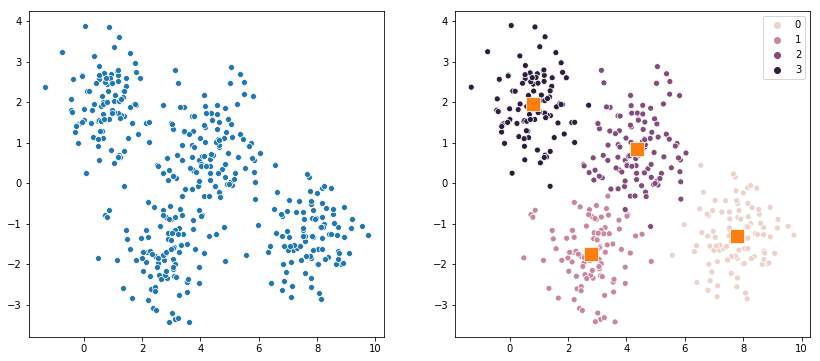

In [15]:
from fcmeans import FCM

# fit the fuzzy-c-means
fcm = FCM(n_clusters=4)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
f, axes = plt.subplots(1, 2, figsize=(14,6))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

### In case of any queries contact - Eshan Jain @ eshanjain.ej+greyatom@gmail.com

** Thank You!! **